이 글에서는 LULU(Lululemon Atheletica Inc.)라는 주식 자료를 시각화해보고, 그에 대해서 해석해보았다. 특히 해당 주식 추세선의 bollanger band를 그려보려고 하였다.

파이썬 코드는 [Compute Bollinger Bands for stocks with Python and Pandas](https://tcoil.info/compute-bollinger-bands-for-stocks-with-python-and-pandas)
에서 가져왔다.
여기에서 주식 종류를을 LULU로 지정하고, bollinger band를 그리는 것과 관련 없는 불필요한 코드를 모두 제거하여 코드를 구성했다.
그리고 각 줄에 대하여 설명을 적거나 관련 자료를 캡쳐나 링크 형식으로 적었다.

현재 aiffel linux 환경에서는 두 패키지(`pandas_reader`, `yfinance`)가 설치되어 있지 않다.
따라서 아래의 두 명령어를 실행시켜줘야 한다.

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

%matplotlib inline

 - Cell 1 : line 1, 2
 
첫 두 줄은, 이 jupyter notebook의 내용이 HTML형식에서 잘 출력되도록 하는 코드인 것 가
 
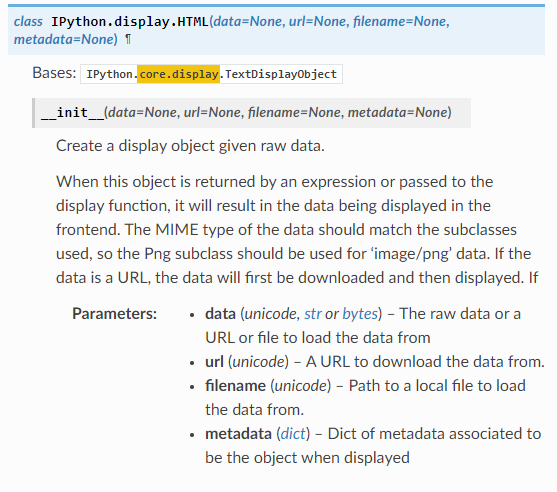

Cell 1 : line 4
`import pandas_datareader.data as pdr`
원래 코드에서는 `pandas_datareader`라는 패키지를 `web`이라는 약어로 불러왔다.
하지만, 다른 자료들에서는 대부분 `pdr`이라는 약어를 쓰므로, 여기서는 `pdr`로 바꾸었다.

이따가 세 번째 셀에서 `pdr` 패키지의 `get_data_yahoo`라는 메소드를 사용할 것이다.
이 메소드에, 각 주식들의 별명을 입력하면, [yahoo finance](https://finance.yahoo.com/)에 등록되어 있는 주식 자료들을 `pandasDataFrame`형식으로 불러오게 된다.
여기서 별명(ticker)이라 함은, 해당 사이트(yahoo finance)에서 각 주식들을 부르는 별칭이다.
예를 들어 다음과 같은 별명들이 있다.
 - AAPL : 애플
 - AMZN : 아마존
 - SMSN.IL : 삼성전자
 - LULU : Lululemon Athletica Inc.

In [8]:
# ___variables___
ticker = 'LULU'

start_time = datetime.datetime(2020, 9, 2)
end_time = datetime.datetime.now().date().isoformat()         # today

In [3]:
# yahoo gives only daily historical data
connected = False
while not connected:
    try:
        df = pdr.get_data_yahoo(ticker, start=start_time, end=end_time)
        connected = True
        print('connected to yahoo')
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

# use numerical integer index instead of date    
df = df.reset_index()
print(df.head(5))


connected to yahoo
        Date        High         Low        Open       Close   Volume  \
0 2020-09-02  399.899994  387.079987  398.109985  398.290009  1631300   
1 2020-09-03  396.829987  376.369995  393.390015  377.869995  2412900   
2 2020-09-04  376.399994  345.970001  372.390015  361.410004  3111700   
3 2020-09-08  365.000000  348.500000  351.010010  349.799988  3512500   
4 2020-09-09  334.920013  315.250000  334.829987  323.929993  8543100   

    Adj Close  
0  398.290009  
1  377.869995  
2  361.410004  
3  349.799988  
4  323.929993  


In [4]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [5]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df = bollinger_bands(df, 20, 2)

In [6]:
print(df.head())
print(df.tail())


        Date        High         Low        Open       Close   Volume  \
0 2020-09-02  399.899994  387.079987  398.109985  398.290009  1631300   
1 2020-09-03  396.829987  376.369995  393.390015  377.869995  2412900   
2 2020-09-04  376.399994  345.970001  372.390015  361.410004  3111700   
3 2020-09-08  365.000000  348.500000  351.010010  349.799988  3512500   
4 2020-09-09  334.920013  315.250000  334.829987  323.929993  8543100   

    Adj Close  B_MA  BU  BL  
0  398.290009   NaN NaN NaN  
1  377.869995   NaN NaN NaN  
2  361.410004   NaN NaN NaN  
3  349.799988   NaN NaN NaN  
4  323.929993   NaN NaN NaN  
          Date        High         Low        Open       Close   Volume  \
499 2022-08-26  324.899994  310.140015  323.200012  311.309998  1111600   
500 2022-08-29  311.970001  303.660004  304.980011  307.500000  1165100   
501 2022-08-30  312.000000  302.500000  311.359985  307.070007  1179200   
502 2022-08-31  310.489990  295.540009  307.959991  299.959991  1915300   
503 20

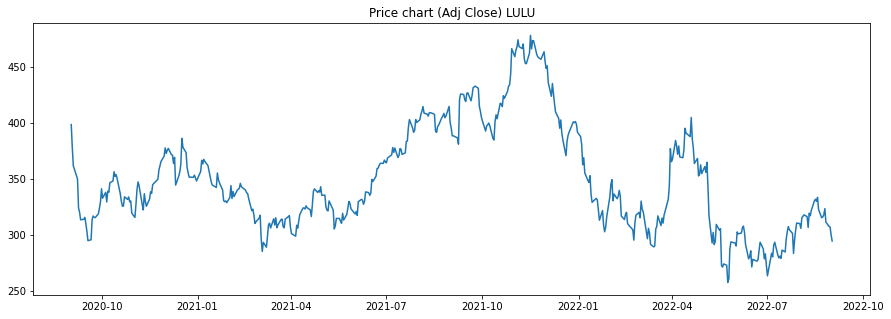

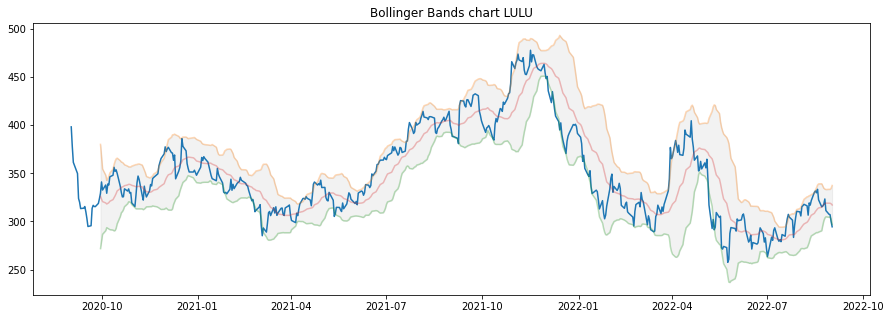

In [7]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close) ' + str(ticker))
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ' + str(ticker))
plt.plot(df['Date'], df['Adj Close'])
plt.plot(df['Date'], df['BU'], alpha=0.3)
plt.plot(df['Date'], df['BL'], alpha=0.3)
plt.plot(df['Date'], df['B_MA'], alpha=0.3)
plt.fill_between(df['Date'], df['BU'], df['BL'], color='grey', alpha=0.1)

plt.show()